# Important imports

In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loadin the data
df = pd.read_csv('../Processed_data/Thyroid_Diff.csv')

## Calculate the correlation matrix

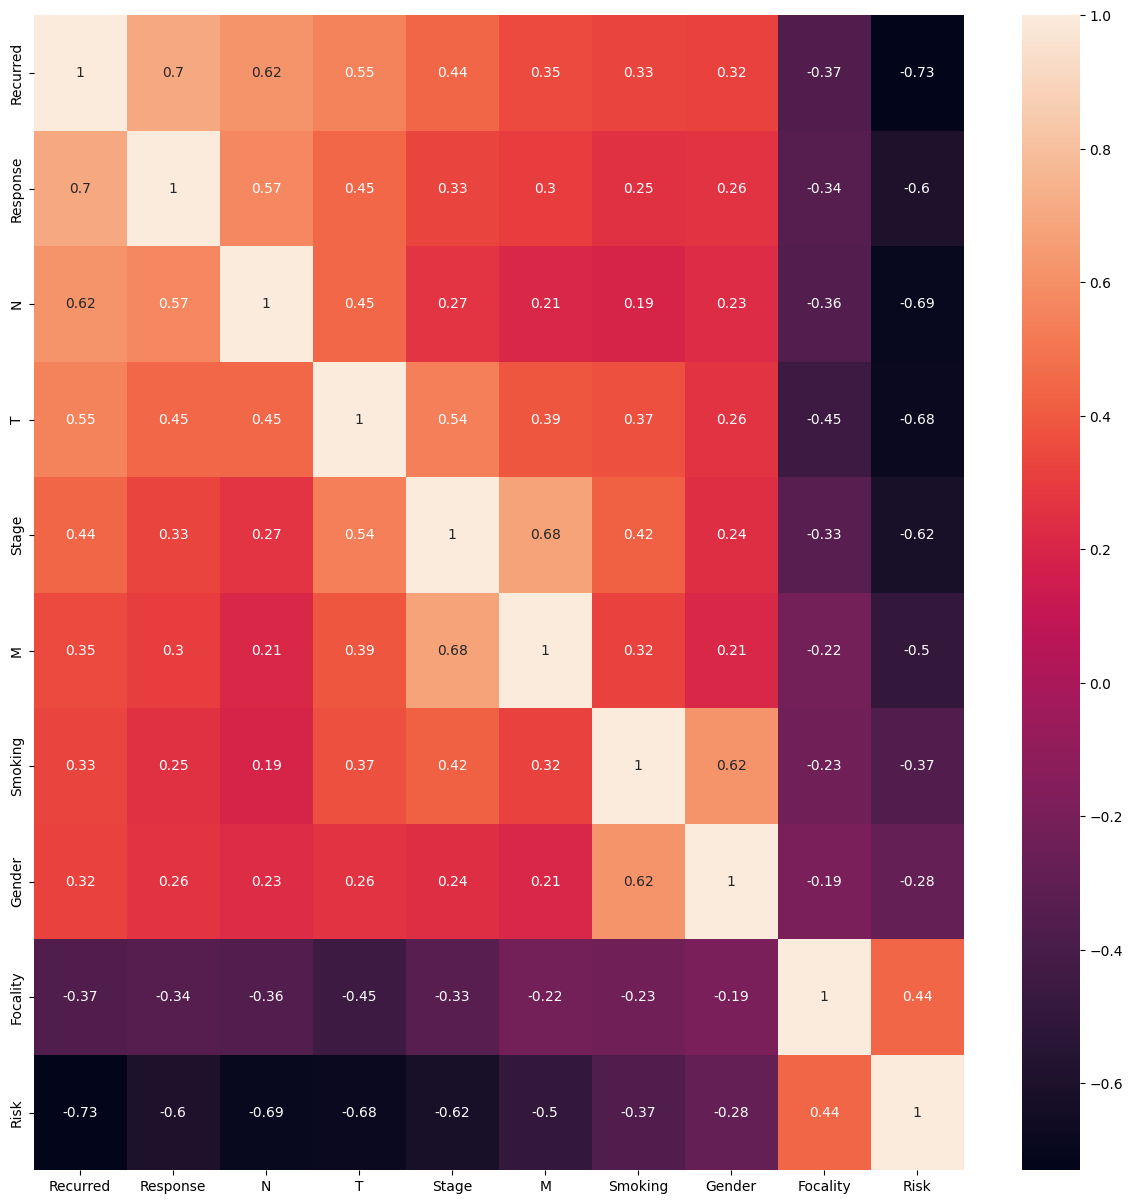

In [17]:
# Calaculate the correlation matrix and round the values to 2 decimal places
corr_matrix = df.corr().round(2)

# Plot the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [4]:
# show the correlation between features and the target variable (Recurred)
features = corr_matrix['Recurred'].sort_values(ascending=False)
features

Recurred                1.00
Response                0.70
N                       0.62
T                       0.55
Stage                   0.44
M                       0.35
Smoking                 0.33
Gender                  0.32
Age                     0.25
Hx Radiothreapy         0.17
Hx Smoking              0.13
Thyroid Function        0.07
Pathology               0.01
Physical Examination   -0.12
Adenopathy             -0.18
Focality               -0.37
Risk                   -0.73
Name: Recurred, dtype: float64

In [5]:
# Select the features with correlation greater than 0.3
selected_features = features[(features > 0.3) | (features < -0.3)]
selected_features

Recurred    1.00
Response    0.70
N           0.62
T           0.55
Stage       0.44
M           0.35
Smoking     0.33
Gender      0.32
Focality   -0.37
Risk       -0.73
Name: Recurred, dtype: float64

In [6]:
selected_features_names = selected_features.index
selected_features_names

Index(['Recurred', 'Response', 'N', 'T', 'Stage', 'M', 'Smoking', 'Gender',
       'Focality', 'Risk'],
      dtype='object')

## Define the features and target variable

In [7]:
df = df[selected_features_names]

X = df.drop('Recurred',axis=1)
y = df['Recurred']

## Split the data into training and testing sets

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Define the model creation function
def create_model(optimizer='adam', init_mode='glorot_uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__init_mode': ['glorot_uniform', 'normal', 'uniform'],
    'batch_size': [10, 15, 20],
    'epochs': [70, 100, 120, 150],
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.9409897292250232 using {'batch_size': 15, 'epochs': 150, 'model__init_mode': 'glorot_uniform', 'model__optimizer': 'adam'}


In [10]:
# Train the final model using the best parameters
best_params = grid_result.best_params_
final_model = create_model(optimizer=best_params['model__optimizer'], init_mode=best_params['model__init_mode'])
history = final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/150


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.2925 - loss: 0.8333 
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.2927 - loss: 0.7725
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.2812 - loss: 0.7296
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.3017 - loss: 0.6748
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.4325 - loss: 0.6426
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6664 - loss: 0.6270
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8045 - loss: 0.5838
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8750 - loss: 0.5664
Epoch 9/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8803 - loss: 0.5649
Epoch 10/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8799 - loss: 0.5500
Epoch 11/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8508 - loss: 0.5132
Epoch 12/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/ste

## Model evaluation

In [11]:
# Evaluate the model
scores = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")

Accuracy: 96.36363387107849%


In [12]:
# Calc the AUC score
y_pred = final_model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int).flatten()
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {roc_auc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
AUC: 0.9597953216374269


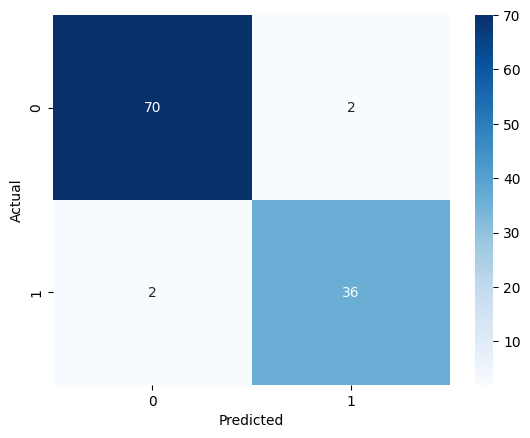

In [13]:
# Calc the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Calc the sensitivity and specificity

# Sensitivity = TP / (TP + FN)

sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print(f"Sensitivity: {sensitivity}")

# Specificity = TN / (TN + FP)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print(f"Specificity: {specificity}")

Sensitivity: 0.9473684210526315
Specificity: 0.9722222222222222


## Model saving

In [15]:
# # Saving model
# final_model.save("saved_models/Ann_model.h5")

Accuracy: 97.27272987365723%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
AUC: 0.9729532163742691


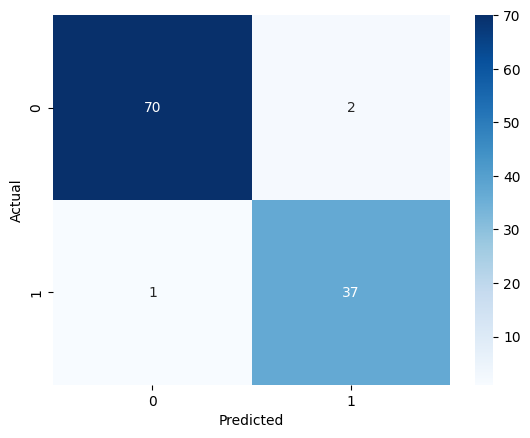

Sensitivity: 0.9736842105263158
Specificity: 0.9722222222222222


In [16]:
# Load the model
loaded_model = load_model("saved_models/Ann_model.h5")

# Evaluate the loaded model
scores = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")

# Calc the AUC score
y_pred = loaded_model.predict(X_test)   
y_pred = (y_pred >= 0.5).astype(int).flatten()
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {roc_auc}")

# Calc the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calc the sensitivity and specificity

# Sensitivity = TP / (TP + FN)

sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print(f"Sensitivity: {sensitivity}")

# Specificity = TN / (TN + FP)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print(f"Specificity: {specificity}")